In [1]:
import os
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
from dotenv import load_dotenv
from ultralytics import YOLO

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline

YOLO_model_dir = Path(os.getenv('YOLO_MODEL_DIR'))
data_dir = Path(os.getenv('DATASET_DIR')) / 'DENTEX CHALLENGE 2023'


/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
from utils.data import DentexDataset

dataset = DentexDataset(root_dir=data_dir)

len(dataset)


634

In [3]:
model = YOLO(YOLO_model_dir / 'enumerate.pt')

model



0: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 2 34s, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 3 44s, 1 45, 1 46, 1 47, 84.1ms
Speed: 2.6ms preprocess, 84.1ms inference, 5.3ms postprocess per image at shape (1, 3, 640, 640)


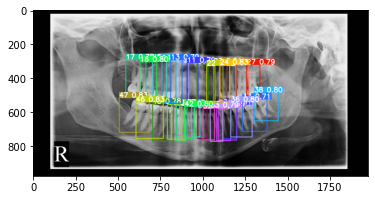

In [4]:
results = model(dataset[0][0])

plot = results[0].plot()

plt.imshow(plot)
plt.show()


In [5]:
from utils.data import LeyanDataset

data_dir = Path(os.getenv('DATASET_DIR')) / 'phase-3'

root_dir = data_dir

dataset = LeyanDataset(root_dir=root_dir)

len(dataset)


71

In [6]:
for i in range(len(dataset)):
    img_name = dataset.img_paths[i].stem
    data = dataset[i]
    _, label, _ = data

    file_content = ''
    for key, xyxy in label.items():
        x1, x2, y1, y2 = xyxy.astype(int)

        text_line = f'{key} {x1} {x2} {y1} {y2} \n'

        file_content += text_line

    with open(f'gt/{img_name}.txt', 'w') as f:
        f.write(file_content)


# YOLOv8 eval

In [7]:
model = YOLO(YOLO_model_dir / 'enumerate.pt')
# model = YOLO(YOLO_model_dir / '8-bound-v8.pt')
results = model(dataset.img_paths)



0: 320x640 (no detections), 1: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 41, 1 42, 1 43, 1 44, 1 45, 2 46s, 1 47, 2: 320x640 1 11, 1 12, 1 25, 1 26, 1 27, 1 33, 1 34, 1 42, 1 43, 2 44s, 1 45, 1 46, 3: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 4: 320x640 1 11, 1 12, 2 13s, 2 14s, 2 15s, 2 16s, 2 17s, 1 21, 1 22, 1 23, 1 27, 1 31, 1 32, 1 33, 1 34, 1 37, 1 41, 1 42, 1 43, 2 44s, 2 45s, 2 46s, 2 47s, 5: 320x640 1 11, 1 12, 1 13, 1 14, 1 15, 2 16s, 2 18s, 1 21, 1 22, 1 23, 1 24, 2 25s, 2 26s, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 2 47s, 1 48, 6: 320x640 1 11, 1 12, 1 13, 2 14s, 1 15, 1 16, 1 17, 1 18, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 

In [8]:
names = results[0].names

for i in range(len(results)):
    xyxy = results[i].boxes.xyxy
    conf = results[i].boxes.conf
    cls = results[i].boxes.cls

    file_content = ''
    for j in range(len(xyxy)):
        name = names[cls[j].int().item()]
        x1, x2, y1, y2 = xyxy[j].int()

        text_line = f'{name} {conf[j]:.6f} {x1} {x2} {y1} {y2} \n'
        file_content += text_line

    img_name = Path(results[i].path).stem
    with open(f'yolov8/{img_name}.txt', 'w') as f:
        f.write(file_content)


In [9]:
import torch
from utils.edge import bounding_teeth_on_origin

model = torch.hub.load(YOLO_model_dir / '..', 'custom', path=YOLO_model_dir / '8-bound.pt', source='local')
results = model(dataset.img_paths)


requirements: /opt/miniconda3/envs/pt113/lib/python3.9/site-packages/yolov5/requirements.txt not found, check failed.


In [11]:
teeth_region = bounding_teeth_on_origin(results, rotation_fix=False)
teeth_region


error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
